In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import quantecon as qe
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.filters.hp_filter import hpfilter



a)
All data is taken from FRED

In [2]:
cpi_path = "3_data/CPILFESL.csv"
interest_path = "3_data/DTB3.csv"
gdp_path = "3_data/GDPC1.csv"
nasdaq_path = "3_data/NASDAQCOM.csv"
gpr_path = "3_data/data_gpr_export.xls"

cpi

In [3]:
start_date = "1985-01-01"
end_date = "2024-12-31"

In [4]:
cpi = pd.read_csv(cpi_path, parse_dates=['observation_date'])
cpi.set_index('observation_date', inplace=True)
cpi = cpi.resample('Q').mean()
cpi = cpi.loc[start_date:end_date]
cpi.index = cpi.index.to_period('Q').to_timestamp('Q')
cpi

C:\Users\ikorn\AppData\Local\Temp\ipykernel_25716\2612812821.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cpi = cpi.resample('Q').mean()


,CPILFESL
observation_date,
1985-03-31,107.633333
1985-06-30,108.766667
1985-09-30,109.733333
1985-12-31,111.000000
1986-03-31,112.200000
...,...
2023-12-31,312.345333
2024-03-31,315.568667
2024-06-30,317.997333


interest rate

In [5]:
interest = pd.read_csv(interest_path, parse_dates=['observation_date'])
interest.set_index('observation_date', inplace=True)
interest = interest.resample('Q').mean()
interest = interest.loc[start_date:end_date]
interest

C:\Users\ikorn\AppData\Local\Temp\ipykernel_25716\1988002286.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  interest = interest.resample('Q').mean()


,DTB3
observation_date,
1985-03-31,8.175000
1985-06-30,7.468413
1985-09-30,7.106032
1985-12-31,7.163710
1986-03-31,6.899667
...,...
2023-12-31,5.282903
2024-03-31,5.233934
2024-06-30,5.246190


gdp

In [6]:
gdp = pd.read_csv(gdp_path, parse_dates=['observation_date'])
gdp.set_index('observation_date', inplace=True)
gdp = gdp.loc[start_date:end_date]
gdp.index = gdp.index.to_period('Q').to_timestamp('Q')
gdp


,GDPC1
observation_date,
1985-03-31,8400.820
1985-06-30,8474.787
1985-09-30,8604.220
1985-12-31,8668.188
1986-03-31,8749.127
...,...
2023-12-31,22960.600
2024-03-31,23053.545
2024-06-30,23223.906


NASDAQ 

In [7]:
nasdaq = pd.read_csv(nasdaq_path, parse_dates=['observation_date'])
nasdaq.set_index('observation_date', inplace=True)
nasdaq = nasdaq.resample('Q').mean()
nasdaq = nasdaq.loc[start_date:end_date]
nasdaq

C:\Users\ikorn\AppData\Local\Temp\ipykernel_25716\918248874.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  nasdaq = nasdaq.resample('Q').mean()


,NASDAQCOM
observation_date,
1985-03-31,275.148387
1985-06-30,286.216984
1985-09-30,296.462063
1985-12-31,302.737031
1986-03-31,347.852951
...,...
2023-12-31,13910.692698
2024-03-31,15692.028689
2024-06-30,16621.268571


geo.risk

In [8]:
gpr = pd.read_excel("3_data/data_gpr_export.xlsx", sheet_name="Sheet1")
gpr.rename(columns={gpr.columns[0]: "Date"}, inplace=True)  
gpr['Date'] = pd.to_datetime(gpr['Date'], dayfirst=True)
gpr.set_index('Date', inplace=True)

In [9]:
gpr_quarterly = gpr['GPRC_USA'].resample('Q').mean()
gpr_quarterly = gpr_quarterly.loc[start_date:end_date]
gpr_quarterly

C:\Users\ikorn\AppData\Local\Temp\ipykernel_25716\705375974.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  gpr_quarterly = gpr['GPRC_USA'].resample('Q').mean()


Date
1985-03-31    2.791282
1985-06-30    2.731931
1985-09-30    2.478641
1985-12-31    2.509639
1986-03-31    2.703836
                ...   
2023-12-31    3.859624
2024-03-31    3.395246
2024-06-30    3.268489
2024-09-30    2.755121
2024-12-31    3.153641
Freq: QE-DEC, Name: GPRC_USA, Length: 160, dtype: float64

Combining

In [10]:
df_all = pd.concat([gdp, cpi, interest, nasdaq, gpr_quarterly], axis=1).dropna()
df_all

,GDPC1,CPILFESL,DTB3,NASDAQCOM,GPRC_USA
1985-03-31,8400.820,107.633333,8.175000,275.148387,2.791282
1985-06-30,8474.787,108.766667,7.468413,286.216984,2.731931
1985-09-30,8604.220,109.733333,7.106032,296.462063,2.478641
1985-12-31,8668.188,111.000000,7.163710,302.737031,2.509639
1986-03-31,8749.127,112.200000,6.899667,347.852951,2.703836
...,...,...,...,...,...
2023-12-31,22960.600,312.345333,5.282903,13910.692698,3.859624
2024-03-31,23053.545,315.568667,5.233934,15692.028689,3.395246
2024-06-30,23223.906,317.997333,5.246190,16621.268571,3.268489
2024-09-30,23400.294,319.869000,4.997969,17610.607969,2.755121


b)

In [11]:
gdp.rename(columns={'GDPC1': 'Real_GDP'}, inplace=True)
gdp['log_GDP'] = np.log(gdp['Real_GDP'])

In [12]:
# for quarterly data, h = 8 and p = 4 are recommended (https://quanteconpy.readthedocs.io/en/latest/tools/filter.html)
cycle, trend = qe.hamilton_filter(gdp['log_GDP'], h=8, p=4)


I applied a log transformation to the real GDP series before filtering. This is a common step in macroeconomics because it helps interpret changes as percentage growth. When you plot GDP in levels, it often looks like an exponential curve, making it hard to spot consistent patterns. But when you log the GDP, it reveals more stable growth over time and shows that the percentage growth rate is often quite steady. The log transformation also reduces variation in the data and turns the upward trend into a straight line, making the series easier to analyze and more suitable for decomposition and modeling.

In [13]:
gdp['hamilton_trend'] = trend
gdp['hamilton_cycle'] = cycle
gdp

,Real_GDP,log_GDP,hamilton_trend,hamilton_cycle
observation_date,,,,
1985-03-31,8400.820,9.036085,NaN,NaN
1985-06-30,8474.787,9.044851,NaN,NaN
1985-09-30,8604.220,9.060008,NaN,NaN
1985-12-31,8668.188,9.067415,NaN,NaN
1986-03-31,8749.127,9.076709,NaN,NaN
...,...,...,...,...
2023-12-31,22960.600,10.041535,10.032495,0.009040
2024-03-31,23053.545,10.045575,10.033096,0.012479
2024-06-30,23223.906,10.052937,10.033608,0.019330


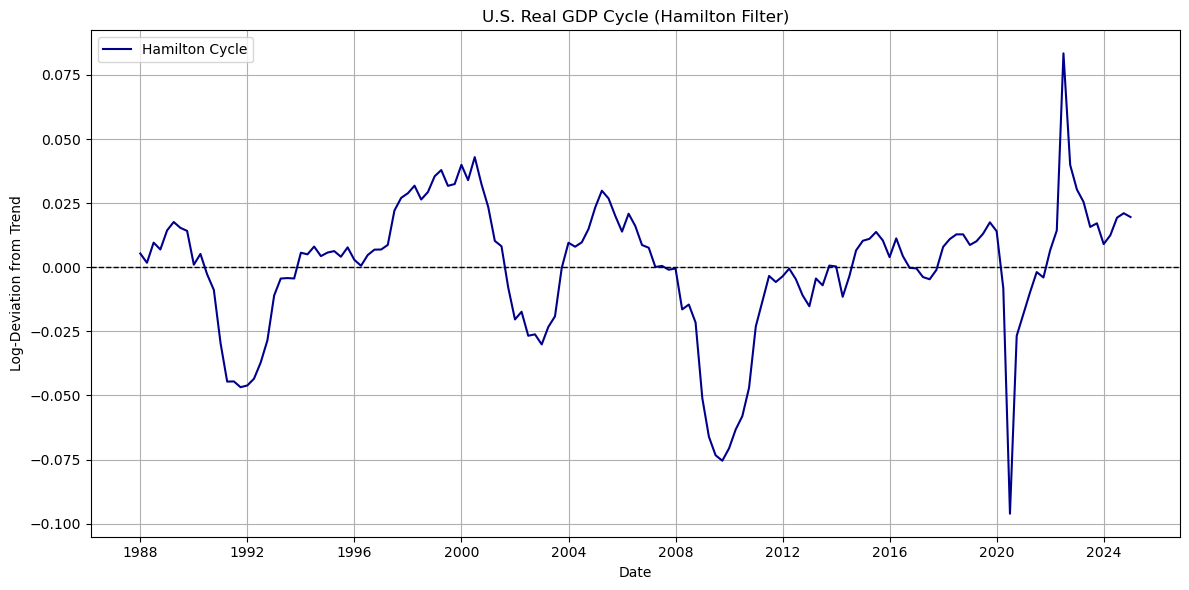

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(gdp.index, gdp['hamilton_cycle'], label='Hamilton Cycle', color='darkblue')
plt.axhline(0, linestyle='--', color='black', linewidth=1)
plt.title('U.S. Real GDP Cycle (Hamilton Filter)')
plt.xlabel('Date')
plt.ylabel('Log-Deviation from Trend')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The Hamilton filter isolates the cyclical component of GDP by regressing future values (8 quarters ahead) on past lags. The resulting residuals represent deviations from the long-term trend.

The plot shows how GDP has deviated from its trend over time, capturing all major U.S. recessions and expansions. The cycle is especially deep during the 2008 crisis and COVID-19, while the post-2020 recovery shows a sharp but short-lived upswing.

c)

i add first difference for each of the series to ensure stationarity of series.

In [15]:
df_transformed = df_all.copy()

df_transformed['dlog_GDP'] = np.log(df_all['GDPC1']).diff()
df_transformed['dlog_CPI'] = np.log(df_all['CPILFESL']).diff()
df_transformed['d_int_rate'] = df_all['DTB3'].diff()
df_transformed['dlog_NASDAQ'] = np.log(df_all['NASDAQCOM']).diff()
df_transformed['d_gpr'] = df_all['GPRC_USA'].diff()

df_transformed = df_transformed[['dlog_GDP', 'dlog_CPI', 'd_int_rate', 'dlog_NASDAQ', 'd_gpr']].dropna()

In [16]:
def adf_test(series, name):
    result = adfuller(series)
    print(f"\nADF Test for {name}:")
    print(f"  Test Statistic  = {result[0]:.4f}")
    print(f"  p-value         = {result[1]:.4f}")
    print(f"  Critical Values = {result[4]}")
    print(f"  Stationary      = {'Yes' if result[1] < 0.05 else 'No'}")

In [17]:
adf_test(df_transformed['dlog_GDP'], 'Log-Diff GDP')
adf_test(df_transformed['dlog_CPI'], 'Log-Diff CPI')
adf_test(df_transformed['d_int_rate'], 'Diff Interest Rate')
adf_test(df_transformed['dlog_NASDAQ'], 'Log-Diff NASDAQ')
adf_test(df_transformed['d_gpr'], 'Diff GPR')


ADF Test for Log-Diff GDP:
  Test Statistic  = -14.2296
  p-value         = 0.0000
  Critical Values = {'1%': -3.4724305215713156, '5%': -2.8800127935315465, '10%': -2.576619230892485}
  Stationary      = Yes

ADF Test for Log-Diff CPI:
  Test Statistic  = -2.1154
  p-value         = 0.2384
  Critical Values = {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}
  Stationary      = No

ADF Test for Diff Interest Rate:
  Test Statistic  = -5.6512
  p-value         = 0.0000
  Critical Values = {'1%': -3.474714913481481, '5%': -2.881008708148148, '10%': -2.5771508444444446}
  Stationary      = Yes

ADF Test for Log-Diff NASDAQ:
  Test Statistic  = -9.7456
  p-value         = 0.0000
  Critical Values = {'1%': -3.4724305215713156, '5%': -2.8800127935315465, '10%': -2.576619230892485}
  Stationary      = Yes

ADF Test for Diff GPR:
  Test Statistic  = -10.1422
  p-value         = 0.0000
  Critical Values = {'1%': -3.4732590518613002, '5%': -2.880374082105334, '1

CPI is still non-stationary

I will try to apply second difference

In [18]:
df_transformed['ddlog_CPI'] = df_transformed['dlog_CPI'].diff()
adf_test(df_transformed['ddlog_CPI'].dropna(), 'Second-Diff Log CPI')


ADF Test for Second-Diff Log CPI:
  Test Statistic  = -5.2953
  p-value         = 0.0000
  Critical Values = {'1%': -3.4753253063120644, '5%': -2.881274703275226, '10%': -2.5772928360116873}
  Stationary      = Yes


I applied appropriate transformations to each series to achieve stationarity. For GDP and NASDAQ, a log-difference was sufficient. The interest rate and geopolitical risk index became stationary after first-differencing. However, the Core CPI series remained non-stationary after log-differencing, so I applied a second difference to remove its persistent trend. ADF tests confirmed that all transformed series are now stationary, making them suitable for further time series analysis.



I used log-diff GDP because applying Gamilton filter to GDP gave me non-stationary result

d)

https://fred.stlouisfed.org/series/NASDAQCOM

https://fred.stlouisfed.org/series/DTB3

https://fred.stlouisfed.org/series/CPILFESL

https://fred.stlouisfed.org/series/GDPC1

https://www.matteoiacoviello.com/gpr.htm

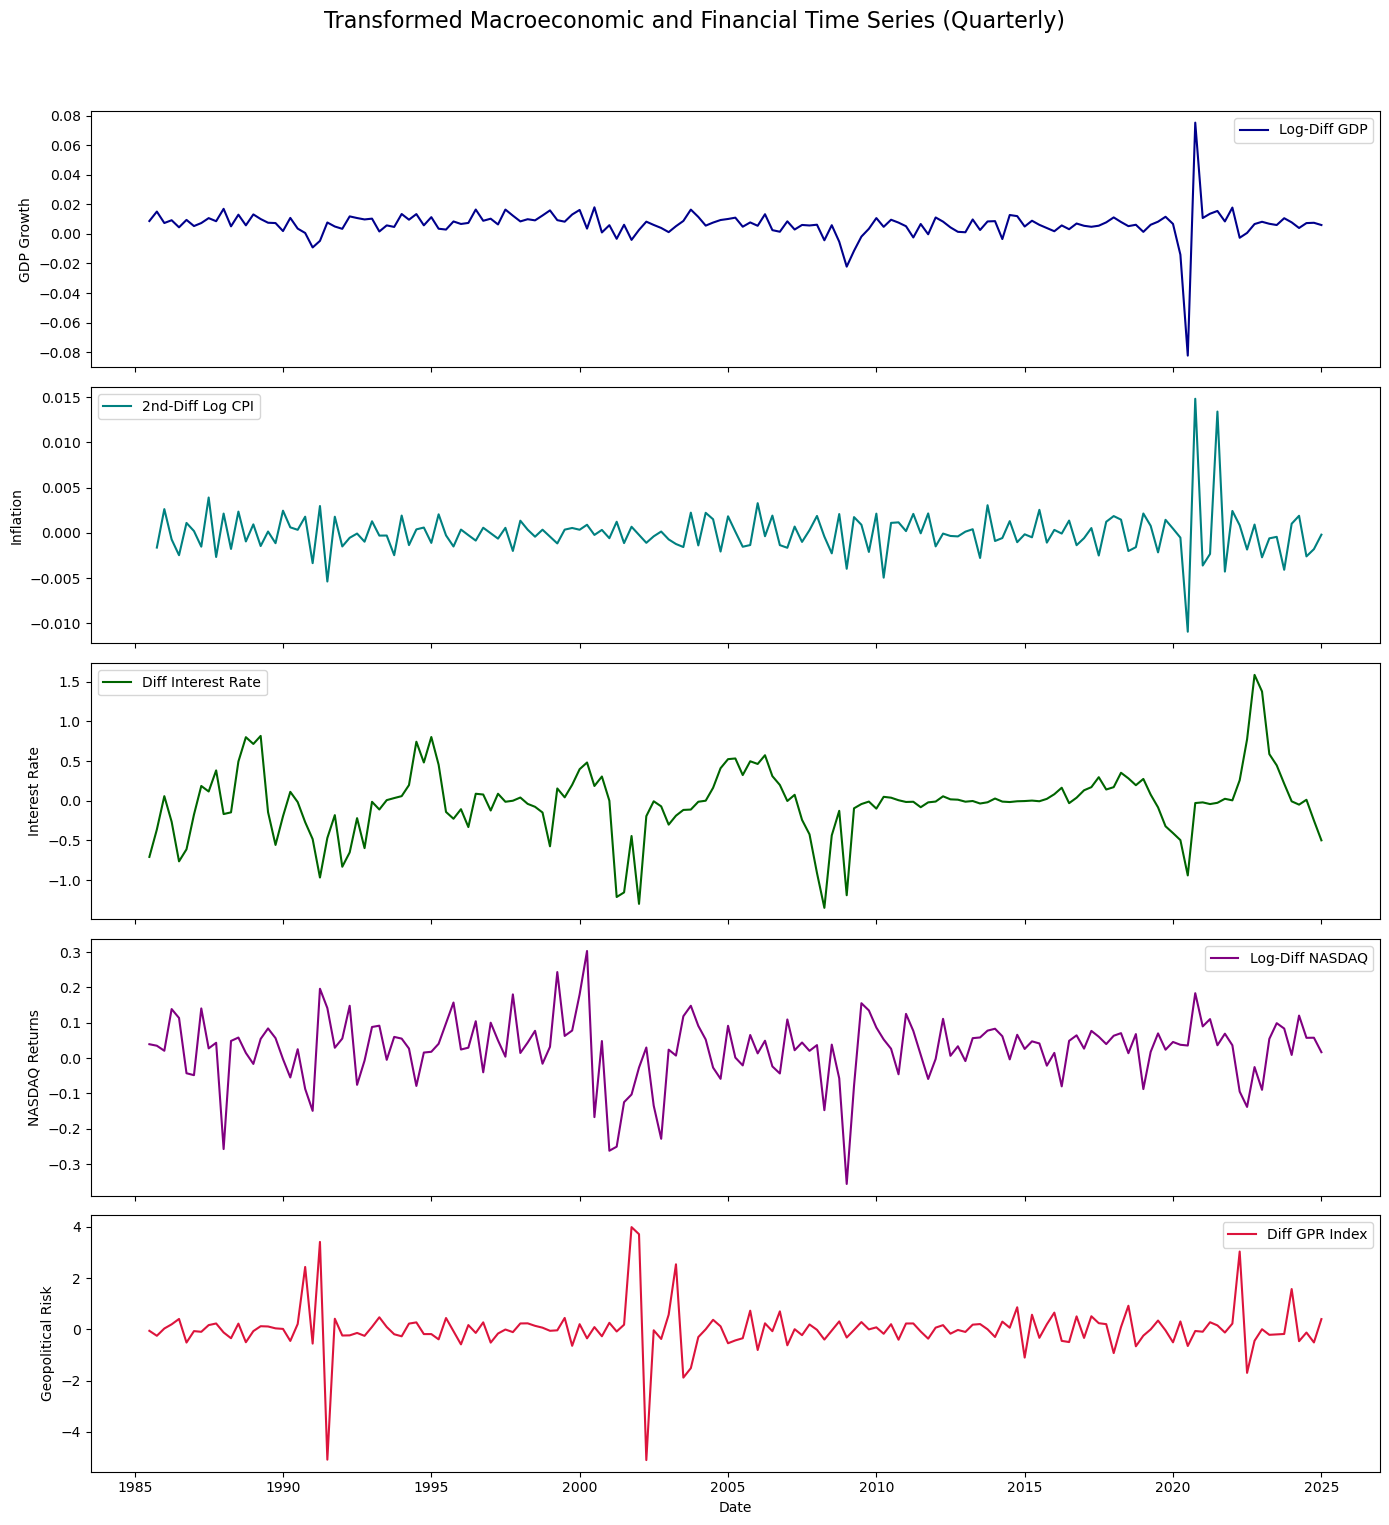

In [19]:
fig, axs = plt.subplots(5, 1, figsize=(14, 16), sharex=True)

axs[0].plot(df_transformed.index, df_transformed['dlog_GDP'], label='Log-Diff GDP', color='darkblue')
axs[0].set_ylabel("GDP Growth")
axs[0].legend()

axs[1].plot(df_transformed.index, df_transformed['ddlog_CPI'], label='2nd-Diff Log CPI', color='teal')
axs[1].set_ylabel("Inflation")
axs[1].legend()

axs[2].plot(df_transformed.index, df_transformed['d_int_rate'], label='Diff Interest Rate', color='darkgreen')
axs[2].set_ylabel("Interest Rate")
axs[2].legend()

axs[3].plot(df_transformed.index, df_transformed['dlog_NASDAQ'], label='Log-Diff NASDAQ', color='purple')
axs[3].set_ylabel("NASDAQ Returns")
axs[3].legend()

axs[4].plot(df_transformed.index, df_transformed['d_gpr'], label='Diff GPR Index', color='crimson')
axs[4].set_ylabel("Geopolitical Risk")
axs[4].legend()

plt.suptitle("Transformed Macroeconomic and Financial Time Series (Quarterly)", fontsize=16)
plt.xlabel("Date")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plotted data clearly shows that the transformed series now fluctuate around a stable mean with no obvious trend — a visual confirmation of stationarity.



-------
For this analysis, I collected quarterly U.S. macroeconomic and financial data covering the period from 2000 Q1 to 2023 Q4. The data was sourced from publicly available and credible databases:

Real GDP: Obtained from the Federal Reserve Bank of St. Louis (FRED), series GDPC1. This series represents inflation-adjusted, seasonally adjusted real gross domestic product.

Core CPI: Collected from FRED, series CPILFESL, which reflects the Consumer Price Index excluding food and energy. Originally monthly, it was converted to quarterly frequency.

3-Month Interest Rate: Taken from FRED, series DTB3, showing the 3-month Treasury Bill secondary market rate. Daily observations were averaged into quarterly values.

NASDAQ Composite Index: Downloaded from FRED using NASDAQCOM. It represents nominal stock market performance and was aggregated from monthly to quarterly data.

Geopolitical Risk Index (GPR): Sourced from Matteo Iacoviello’s official GPR dataset, specifically using the U.S.-specific index GPRC_USA. Monthly values were averaged into quarterly frequency.

-------

FRED's real GDP and CPI series are published in seasonally adjusted form.

Financial indicators (NASDAQ, interest rate) generally do not exhibit seasonal patterns. They do not have seasonal behavior. Their movements are driven by policy decisions, market sentiment, and macroeconomic developments, rather than by predictable, repeating seasonal factors

The GPR index is based on geopolitical news frequency and has no inherent seasonality.





--------
There is an apparent positive co-movement between GDP growth and NASDAQ returns, especially in recovery phases.

Spikes in geopolitical risk often coincide with dips in GDP growth or stock returns, suggesting a possible negative correlation.

e)

In [20]:
df_var = df_transformed[['dlog_GDP', 'ddlog_CPI', 'd_int_rate', 'dlog_NASDAQ', 'd_gpr']].dropna()
model = VAR(df_var)
lag_order_results = model.select_order(maxlags=20) 
print("Lag order selection (BIC):")
print(lag_order_results.summary())

selected_lag = lag_order_results.selected_orders['bic']
print(f"\nSelected lag length (BIC): {selected_lag}")


Lag order selection (BIC):
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -27.87      -27.77   7.851e-13      -27.83
1       -28.77     -28.14*   3.197e-13     -28.51*
2       -28.78      -27.62   3.165e-13      -28.31
3      -29.03*      -27.33  2.482e-13*      -28.34
4       -29.00      -26.77   2.582e-13      -28.09
5       -28.80      -26.04   3.181e-13      -27.68
6       -28.79      -25.50   3.267e-13      -27.45
7       -28.68      -24.86   3.715e-13      -27.13
8       -28.57      -24.22   4.306e-13      -26.80
9       -28.35      -23.47   5.553e-13      -26.37
10      -28.30      -22.89   6.144e-13      -26.10
11      -28.16      -22.22   7.530e-13      -25.75
12      -28.12      -21.65   8.546e-13      -25.49
13      -28.12      -21.12   9.403e-13      -25.27
14      -28.06      -20.53   1.119e-12      -25.00
15      -28.08      -20.02   1.272e-12      -24.80
16  

In [21]:
#use MLE as default
var_result = model.fit(selected_lag)
is_stationary = var_result.is_stable()
is_stationary

True

I estimated a Vector Autoregression (VAR) model including the five transformed variables: GDP growth, second-differenced CPI (inflation), changes in interest rates, NASDAQ returns, and changes in geopolitical risk. Using the Bayesian Information Criterion (BIC), a lag length of 1 was selected. The model was estimated using Maximum Likelihood, and the eigenvalue stability condition was satisfied — meaning the estimated VAR is stationary

f)

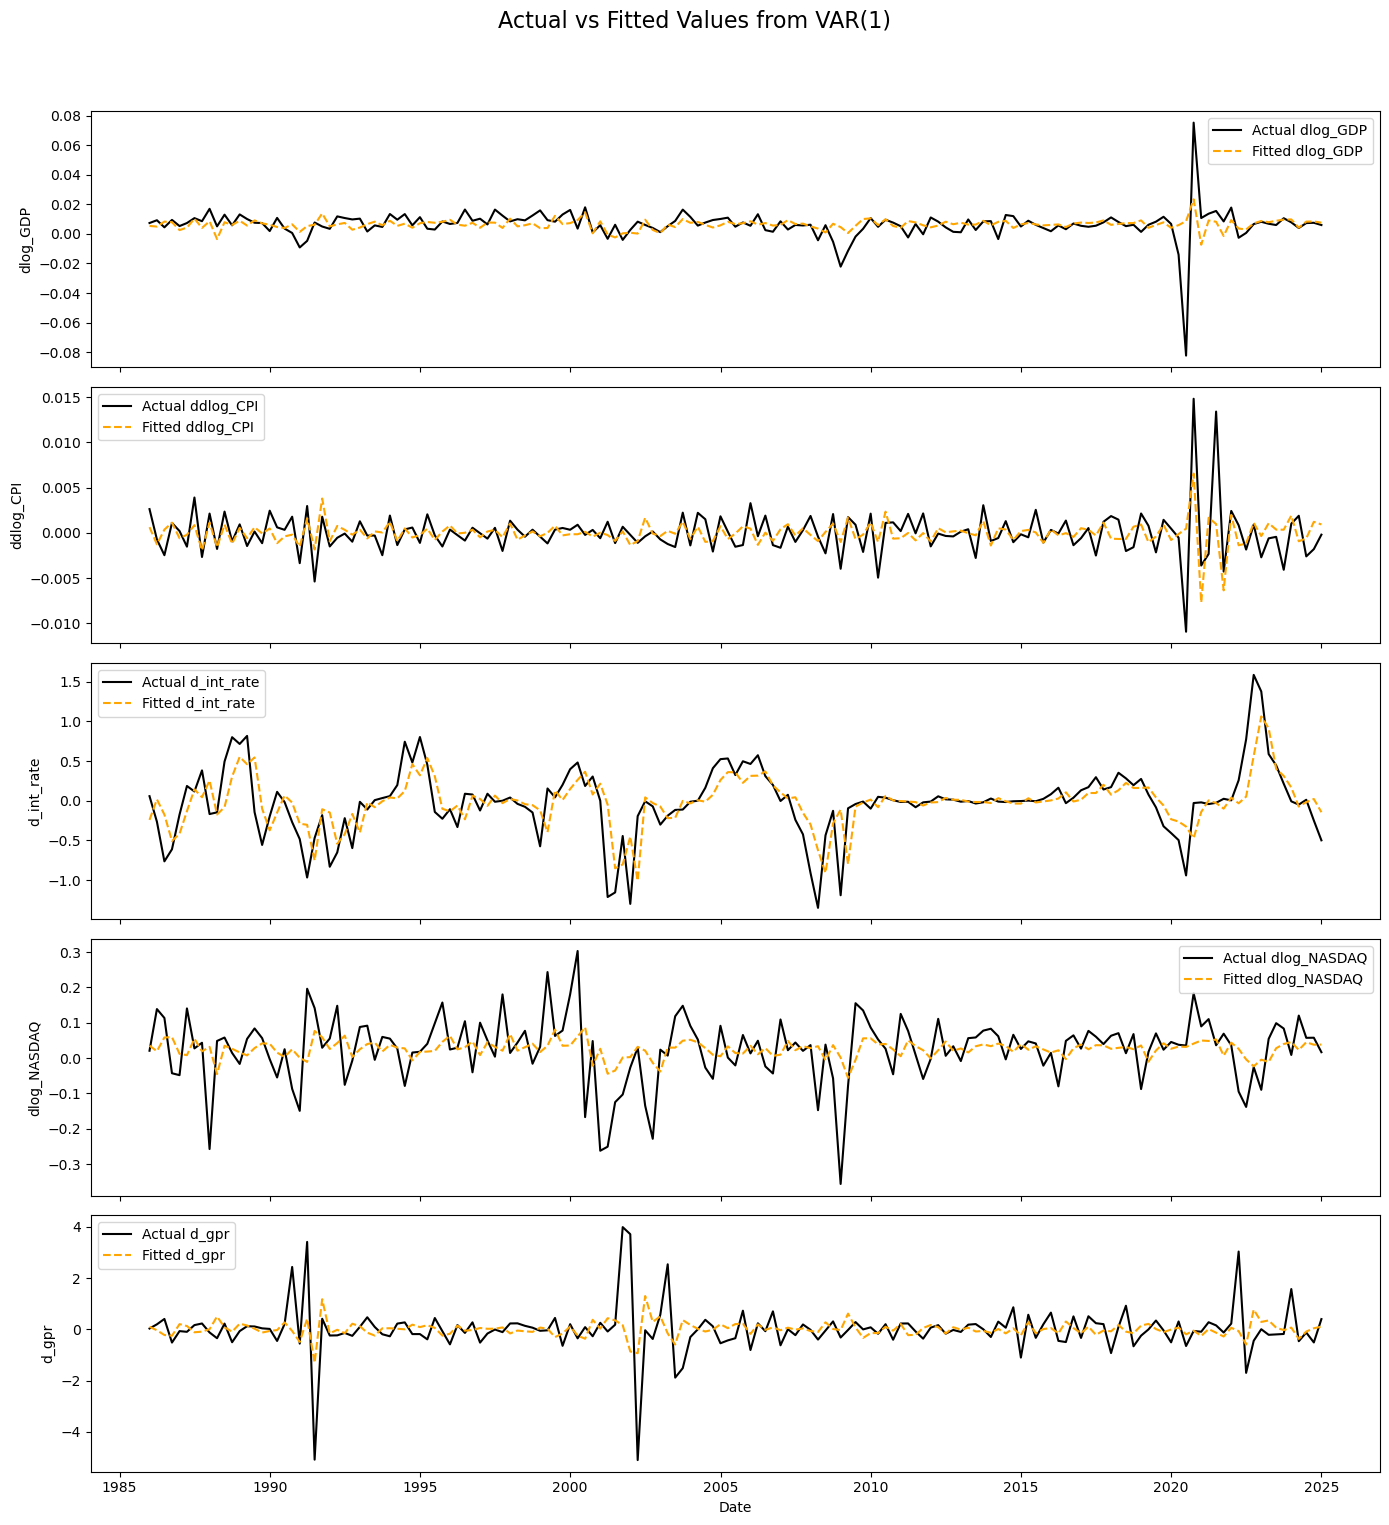

In [22]:
fitted_values = var_result.fittedvalues
actual_values = df_var.iloc[selected_lag:]

fig, axs = plt.subplots(5, 1, figsize=(14, 16), sharex=True)
for i, col in enumerate(df_var.columns):
    axs[i].plot(actual_values.index, actual_values[col], label=f"Actual {col}", color='black')
    axs[i].plot(fitted_values.index, fitted_values[col], label=f"Fitted {col}", color='orange', linestyle='--')
    axs[i].set_ylabel(col)
    axs[i].legend()
plt.suptitle("Actual vs Fitted Values from VAR(1)", fontsize=16)
plt.xlabel("Date")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

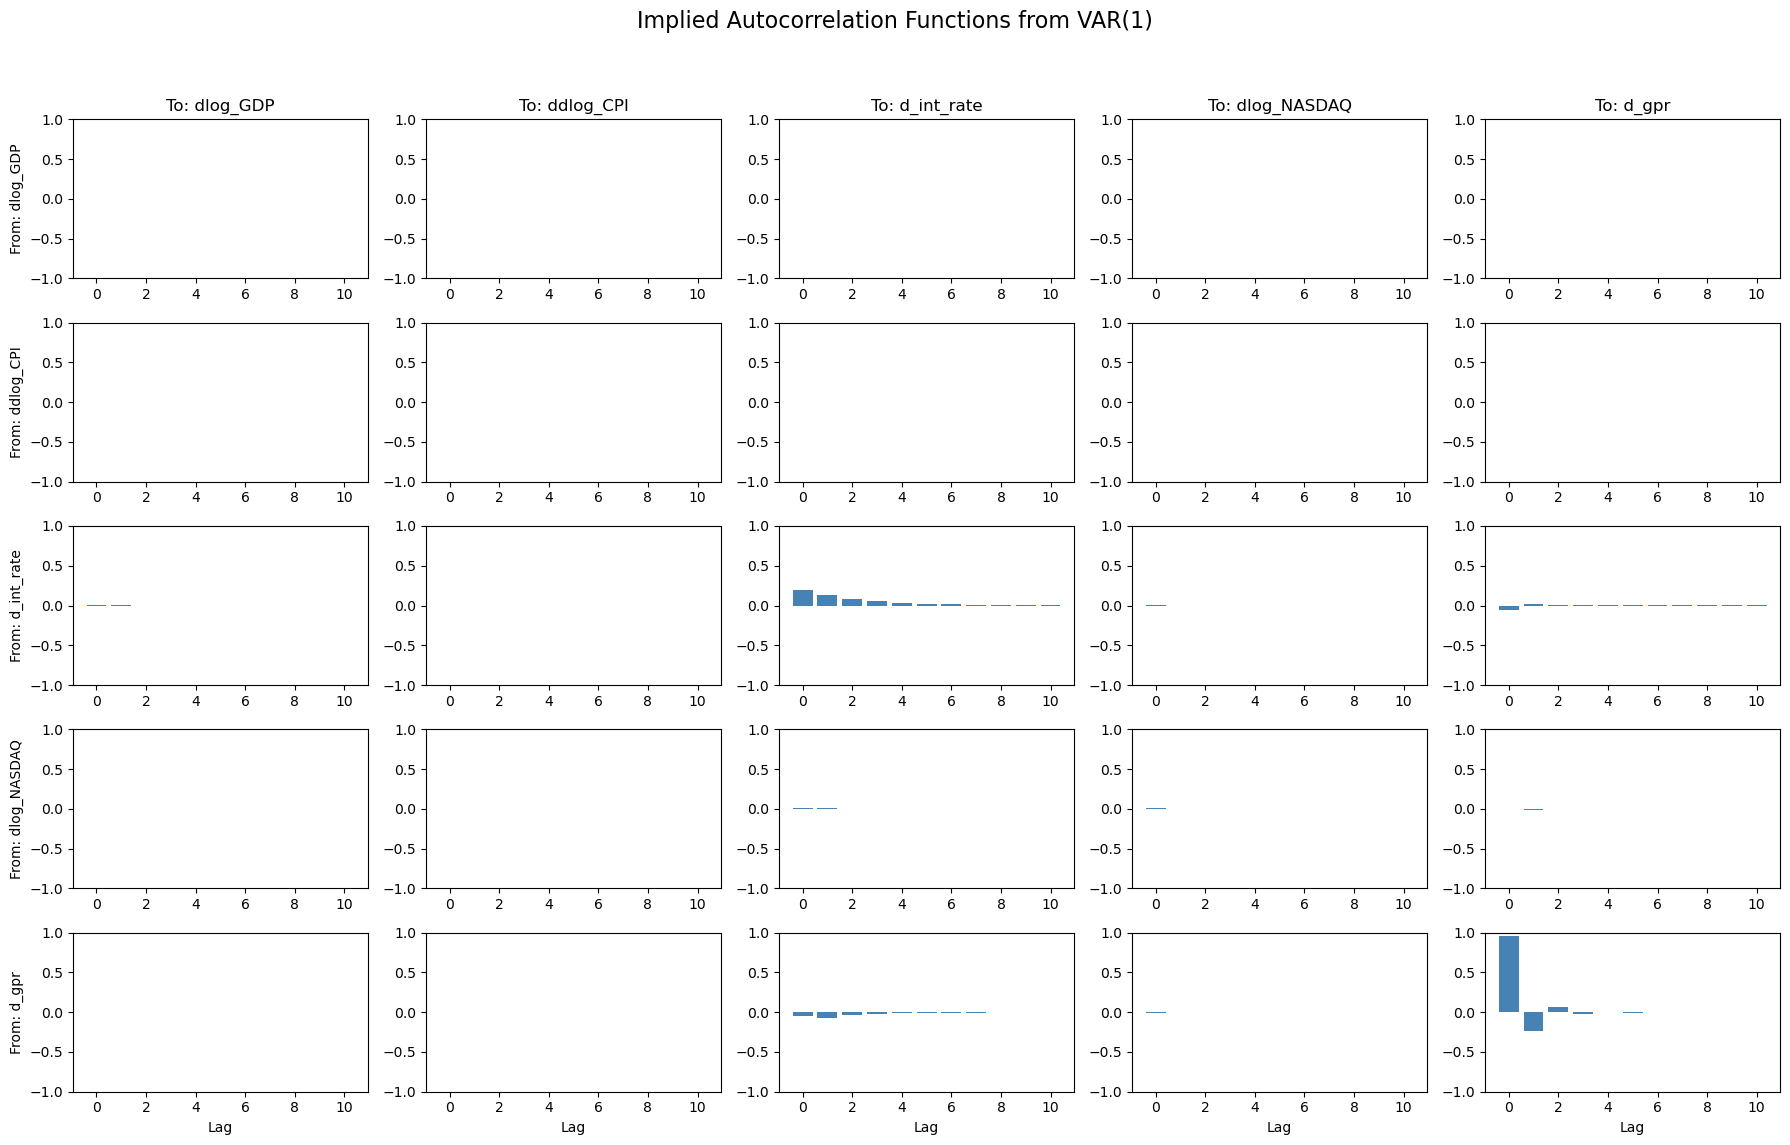

In [23]:
irfs = var_result.acf(10)  

fig, axs = plt.subplots(5, 5, figsize=(18, 12))

for i in range(5):
    for j in range(5):
        axs[i, j].bar(range(11), irfs[:, j, i], color='steelblue')
        axs[i, j].set_ylim(-1, 1)
        if i == 0:
            axs[i, j].set_title(f"To: {df_var.columns[j]}")
        if j == 0:
            axs[i, j].set_ylabel(f"From: {df_var.columns[i]}")
        if i == 4:
            axs[i, j].set_xlabel("Lag")

plt.suptitle("Implied Autocorrelation Functions from VAR(1)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

To explore the dynamic correlation patterns among the variables of interest, I computed the implied autocorrelation functions from the estimated VAR(1) model. These were visualized in a 5×5 grid, where each plot illustrates how a variable responds to past values of another over a 10-quarter horizon. The analysis shows that most autocorrelation is captured at lag 1, and the influence decays quickly — consistent with a parsimonious VAR structure and stationary transformed data.

This type of analysis is useful because it helps us understand how the variables influence each other over time. Instead of only showing if two variables are related, it shows when and how strongly past values of one variable affect others. This gives us a better picture of how economic shocks, like changes in inflation or geopolitical risk, might spread to stock markets or GDP growth, which is exactly the kind of insight my boss would care about.







g)

In [24]:
cutoff = '2014-12-31'
forecast_start = '2015-03-31'
forecast_end = '2023-12-31'

df_cut = df_transformed.copy()
df_estimation = df_cut[df_cut.index <= cutoff]
df_forecast_all = df_cut[(df_cut.index > cutoff) & (df_cut.index <= forecast_end)]

In [25]:
df_estimation = df_estimation.dropna()
model = VAR(df_estimation)
var_result = model.fit(1)

In [26]:
forecast_horizon = 4
nasdaq_preds = []
forecast_dates = []

for i in range(len(df_forecast_all) - forecast_horizon + 1):
    current_index = df_estimation.shape[0] + i
    history = df_cut.iloc[current_index - 1:current_index]

#forecast 4 quarters ahead
    forecast = var_result.forecast(history.values, steps=forecast_horizon)
    pred_value = forecast[-1][df_cut.columns.get_loc('dlog_NASDAQ')]

    forecast_index = df_cut.index[current_index + forecast_horizon - 1]
    forecast_dates.append(forecast_index)
    nasdaq_preds.append(pred_value)

In [27]:
forecast_df = pd.DataFrame({'Forecasted_dlog_NASDAQ': nasdaq_preds}, index=forecast_dates)
actual_df = df_cut.loc[forecast_df.index, ['dlog_NASDAQ']]
result_df = pd.concat([actual_df, forecast_df], axis=1)

In [28]:
result_df['RW_forecast'] = df_transformed['dlog_NASDAQ'].shift(4).loc[result_df.index]
rmse_var = np.sqrt(mean_squared_error(result_df['dlog_NASDAQ'], result_df['Forecasted_dlog_NASDAQ']))
rmse_rw = np.sqrt(mean_squared_error(result_df['dlog_NASDAQ'], result_df['RW_forecast']))

print(f"RMSE (VAR 4Q-ahead forecast): {rmse_var:.5f}")
print(f"RMSE (Random Walk 4Q-ahead forecast): {rmse_rw:.5f}")

RMSE (VAR 4Q-ahead forecast): 0.06691
RMSE (Random Walk 4Q-ahead forecast): 0.10270


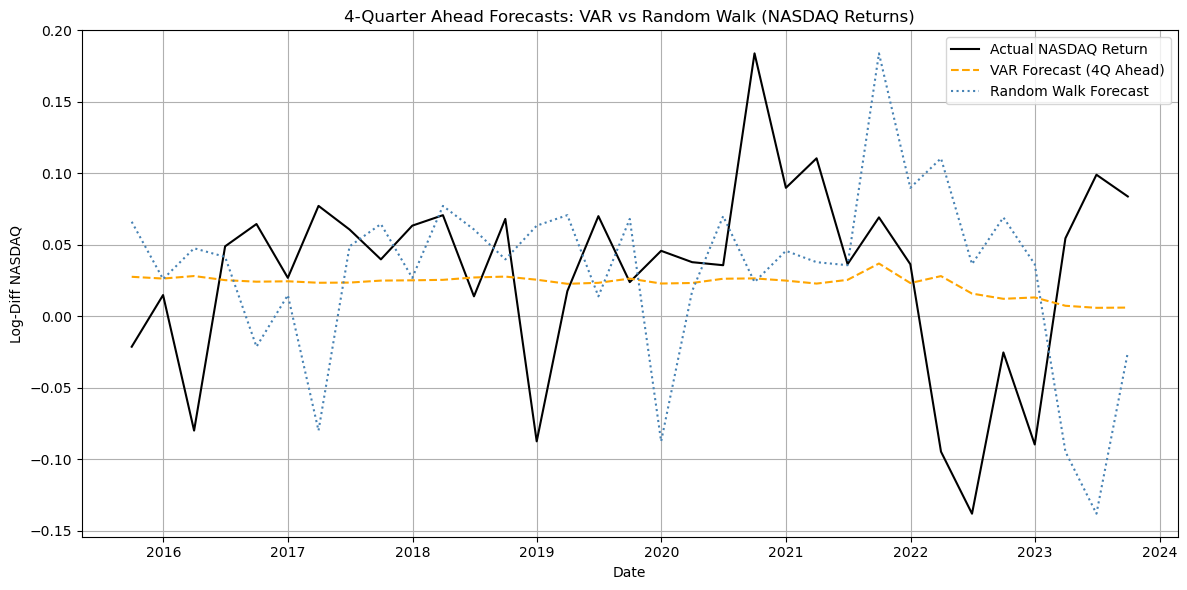

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(result_df.index, result_df['dlog_NASDAQ'], label='Actual NASDAQ Return', color='black')
plt.plot(result_df.index, result_df['Forecasted_dlog_NASDAQ'], label='VAR Forecast (4Q Ahead)', color='orange', linestyle='--')
plt.plot(result_df.index, result_df['RW_forecast'], label='Random Walk Forecast', color='steelblue', linestyle=':')
plt.title("4-Quarter Ahead Forecasts: VAR vs Random Walk (NASDAQ Returns)")
plt.xlabel("Date")
plt.ylabel("Log-Diff NASDAQ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

To evaluate the accuracy of the 4-quarter-ahead forecasts, I compared the performance of the VAR model to a simple Random Walk (RW) benchmark, where each prediction equals the value from four quarters earlier. The results show that the VAR model significantly outperformed the random walk, especially in terms of forecast precision. While both models fail to capture the full extent of volatility in the NASDAQ returns, the VAR model provides a much closer approximation to the actual outcomes. This suggests that including macroeconomic indicators and geopolitical risk can offer real predictive value when forecasting long-term financial returns even with a VAR(1) structure.



h)

In [30]:
forecast_horizon = 4
nasdaq_preds = []
cpi_preds = []
forecast_dates = []

for i in range(len(df_forecast_all) - forecast_horizon + 1):
    current_index = df_estimation.shape[0] + i
    history = df_cut.iloc[current_index - 1:current_index]

    # Forecast 4 quarters ahead
    forecast = var_result.forecast(history.values, steps=forecast_horizon)
    pred_nasdaq = forecast[-1][df_cut.columns.get_loc('dlog_NASDAQ')]
    pred_cpi = forecast[-1][df_cut.columns.get_loc('dlog_CPI')]

    forecast_index = df_cut.index[current_index + forecast_horizon - 1]
    forecast_dates.append(forecast_index)
    nasdaq_preds.append(pred_nasdaq)
    cpi_preds.append(pred_cpi)

forecast_df = pd.DataFrame({
    'Forecasted_dlog_NASDAQ': nasdaq_preds,
    'Forecasted_dlog_CPI': cpi_preds
}, index=forecast_dates)



forecast_df['Real_Return'] = forecast_df['Forecasted_dlog_NASDAQ'] - forecast_df['Forecasted_dlog_CPI']
forecast_df['Is_Positive_Real_Return'] = forecast_df['Real_Return'] > 0

real_returns_2022 = forecast_df.loc[forecast_df.index.year == 2022]
print(real_returns_2022[['Forecasted_dlog_NASDAQ', 'Forecasted_dlog_CPI', 'Real_Return', 'Is_Positive_Real_Return']])


            Forecasted_dlog_NASDAQ  Forecasted_dlog_CPI  Real_Return  \
2022-03-31                0.028136             0.004871     0.023266   
2022-06-30                0.015906             0.011565     0.004341   
2022-09-30                0.012253             0.012575    -0.000322   
2022-12-31                0.013216             0.012875     0.000341   

            Is_Positive_Real_Return  
2022-03-31                     True  
2022-06-30                     True  
2022-09-30                    False  
2022-12-31                     True  


Based on the 4-quarter-ahead forecasts from the VAR model, the predicted real stock market return was positive in three out of the four quarters of 2022.

A negative real return was predicted in Q3 2022, where expected inflation slightly exceeded the nominal return. This may reflect rising inflation pressures during that period.

Overall, the model anticipated modest but positive real gains for most of the year

i)

In [31]:
nasdaq_2022 = forecast_df['Forecasted_dlog_NASDAQ'].loc[forecast_df.index.year == 2022]

# cumulative log-return
cumulative_log_return = nasdaq_2022.sum()
cumulative_percent_return = (np.exp(cumulative_log_return) - 1) * 100

print(f"Cumulative predicted log-return for 2022: {cumulative_log_return:.4f}")
print(f"Cumulative predicted % return for 2022: {cumulative_percent_return:.2f}%")

Cumulative predicted log-return for 2022: 0.0695
Cumulative predicted % return for 2022: 7.20%


The cumulative predicted return for 2022, based on four-quarter-ahead NASDAQ forecasts, is approximately 7.2%. This suggests that, according to the model, the stock market was expected to grow at a healthy rate throughout the year. While the model does not capture high-frequency fluctuations or extreme volatility, it does reflect an overall positive momentum for 2022.



j)

applying HP filter to GDP cycle

In [32]:
cycle, trend = hpfilter(df_transformed['dlog_GDP'], lamb=1600)
df_transformed['hp_cycle_GDP'] = cycle

df_var_hp = df_transformed[['hp_cycle_GDP', 'dlog_CPI', 'd_int_rate', 'dlog_NASDAQ', 'd_gpr']].dropna()


In [33]:
adf_test(df_var_hp['hp_cycle_GDP'], 'HP GDP')



ADF Test for HP GDP:
  Test Statistic  = -15.2418
  p-value         = 0.0000
  Critical Values = {'1%': -3.4724305215713156, '5%': -2.8800127935315465, '10%': -2.576619230892485}
  Stationary      = Yes


HP cycle is stationary

In [34]:
df_var_hp

,hp_cycle_GDP,dlog_CPI,d_int_rate,dlog_NASDAQ,d_gpr
1985-06-30,-0.001277,0.010475,-0.706587,0.039440,-0.059350
1985-09-30,0.005306,0.008848,-0.362381,0.035169,-0.253290
1985-12-31,-0.002252,0.011477,0.057678,0.020945,0.030997
1986-03-31,-0.000174,0.010753,-0.264043,0.138915,0.194198
1986-06-30,-0.004788,0.008284,-0.762479,0.113751,0.403936
...,...,...,...,...,...
2023-12-31,0.000662,0.008375,-0.007414,0.009057,1.571582
2024-03-31,-0.003194,0.010267,-0.048969,0.120495,-0.464378
2024-06-30,0.000090,0.007667,0.012256,0.057530,-0.126757
2024-09-30,0.000256,0.005869,-0.248222,0.057818,-0.513369


VAR estimation and choosing lag (in this case again it is 1)

In [35]:
model = VAR(df_var_hp)
lag_results = model.select_order(maxlags=10)
selected_lag = lag_results.selected_orders['bic']
var_result = model.fit(selected_lag)

Plot actual and fitted results

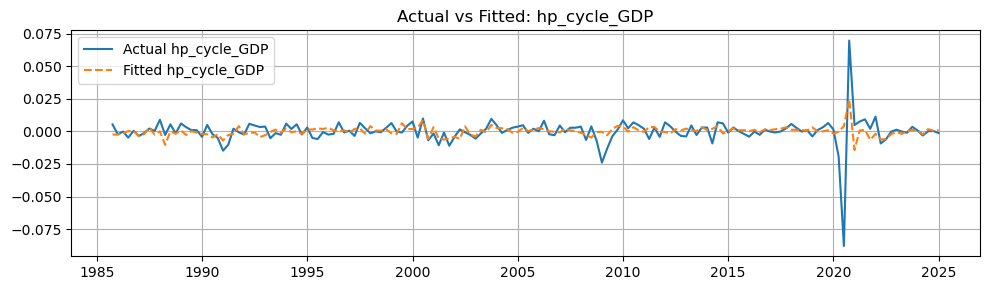

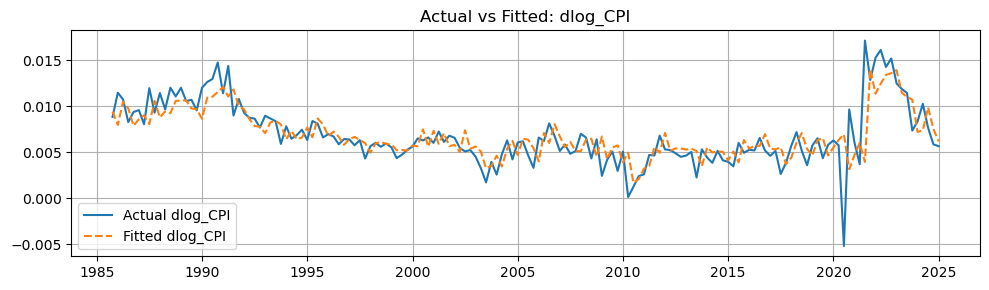

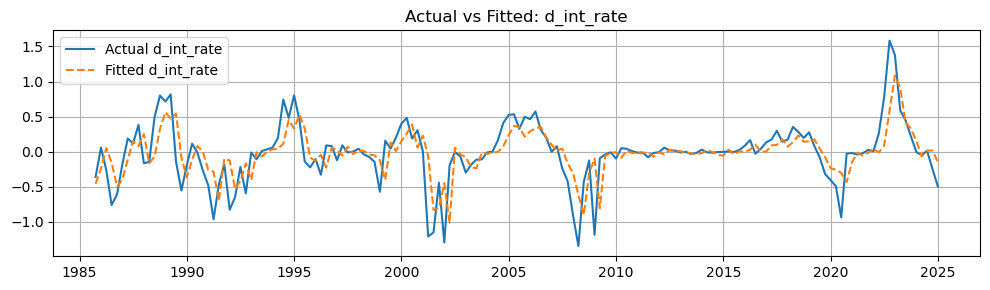

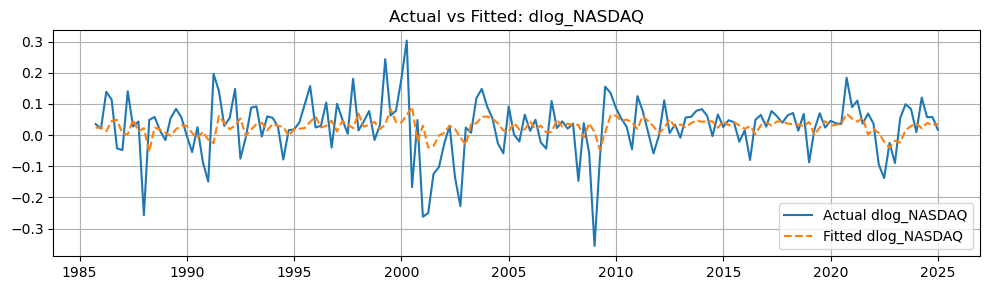

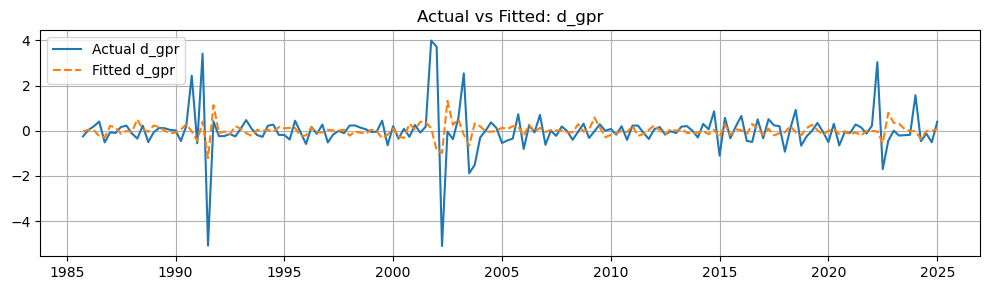

In [36]:
fitted_values = var_result.fittedvalues
for col in df_var_hp.columns:
    plt.figure(figsize=(10, 3))
    plt.plot(df_var_hp.index[selected_lag:], df_var_hp[col][selected_lag:], label=f'Actual {col}')
    plt.plot(fitted_values.index, fitted_values[col], '--', label=f'Fitted {col}')
    plt.title(f'Actual vs Fitted: {col}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

ACF

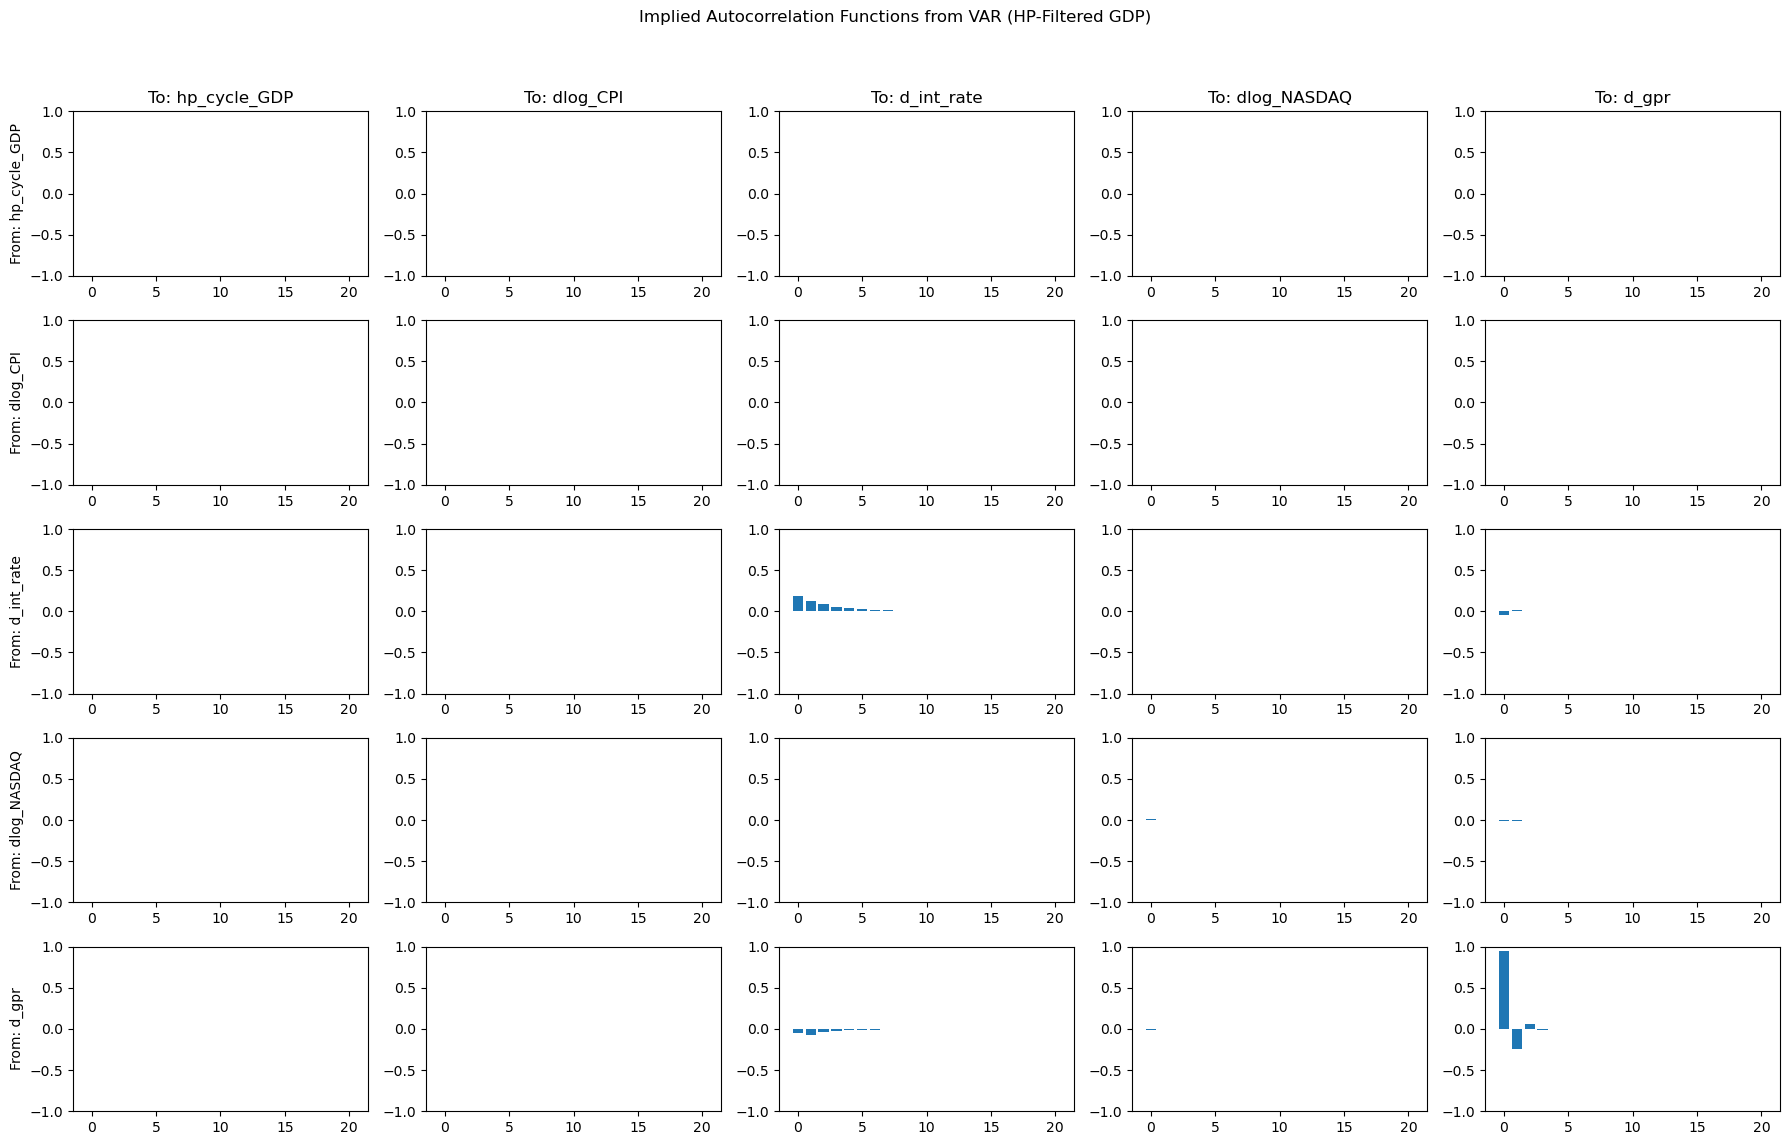

In [37]:
acf_vals = var_result.acf(20)
n = len(df_var_hp.columns)
fig, axs = plt.subplots(n, n, figsize=(18, 12))
for i in range(n):
    for j in range(n):
        axs[i, j].bar(range(21), acf_vals[:, j, i])
        axs[i, j].set_ylim(-1, 1)
        if i == 0:
            axs[i, j].set_title(f'To: {df_var_hp.columns[j]}')
        if j == 0:
            axs[i, j].set_ylabel(f'From: {df_var_hp.columns[i]}')
plt.suptitle("Implied Autocorrelation Functions from VAR (HP-Filtered GDP)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Recursive Forecasting (2015–2023)

In [38]:
cutoff = '2014-12-31'
forecast_start = '2015-03-31'
forecast_end = '2023-12-31'
forecast_horizon = 4

df_cut = df_var_hp.copy()
df_estimation = df_cut[df_cut.index <= cutoff]
df_forecast_all = df_cut[(df_cut.index > cutoff) & (df_cut.index <= forecast_end)]

model = VAR(df_estimation)
var_result = model.fit(selected_lag)

nasdaq_preds = []
forecast_dates = []

for i in range(len(df_forecast_all) - forecast_horizon + 1):
    current_index = df_estimation.shape[0] + i
    history = df_cut.iloc[current_index - selected_lag:current_index]
    forecast = var_result.forecast(history.values, steps=forecast_horizon)
    pred_value = forecast[-1][df_cut.columns.get_loc('dlog_NASDAQ')]
    forecast_index = df_cut.index[current_index + forecast_horizon - 1]
    forecast_dates.append(forecast_index)
    nasdaq_preds.append(pred_value)

forecast_df = pd.DataFrame({'Forecasted_dlog_NASDAQ': nasdaq_preds}, index=forecast_dates)
actual_df = df_cut.loc[forecast_df.index, ['dlog_NASDAQ']]
result_df = pd.concat([actual_df, forecast_df], axis=1)

In [39]:
result_df

,dlog_NASDAQ,Forecasted_dlog_NASDAQ
2015-12-31,0.014878,0.026316
2016-03-31,-0.079927,0.027810
2016-06-30,0.048956,0.024222
2016-09-30,0.064564,0.025342
2016-12-31,0.026913,0.025023
2017-03-31,0.077247,0.024347
2017-06-30,0.060723,0.023456
2017-09-30,0.039831,0.025592
2017-12-31,0.063411,0.025562
2018-03-31,0.070749,0.025308


Compare with Random Walk and RMSE

In [40]:
result_df['RW_forecast'] = df_transformed['dlog_NASDAQ'].shift(4).loc[result_df.index]
rmse_var = np.sqrt(mean_squared_error(result_df['dlog_NASDAQ'], result_df['Forecasted_dlog_NASDAQ']))
rmse_rw = np.sqrt(mean_squared_error(result_df['dlog_NASDAQ'], result_df['RW_forecast']))
print(f"RMSE (VAR w/ HP-filtered GDP): {rmse_var:.5f}")
print(f"RMSE (Random Walk): {rmse_rw:.5f}")

RMSE (VAR w/ HP-filtered GDP): 0.06578
RMSE (Random Walk): 0.10301


Plotting comparison

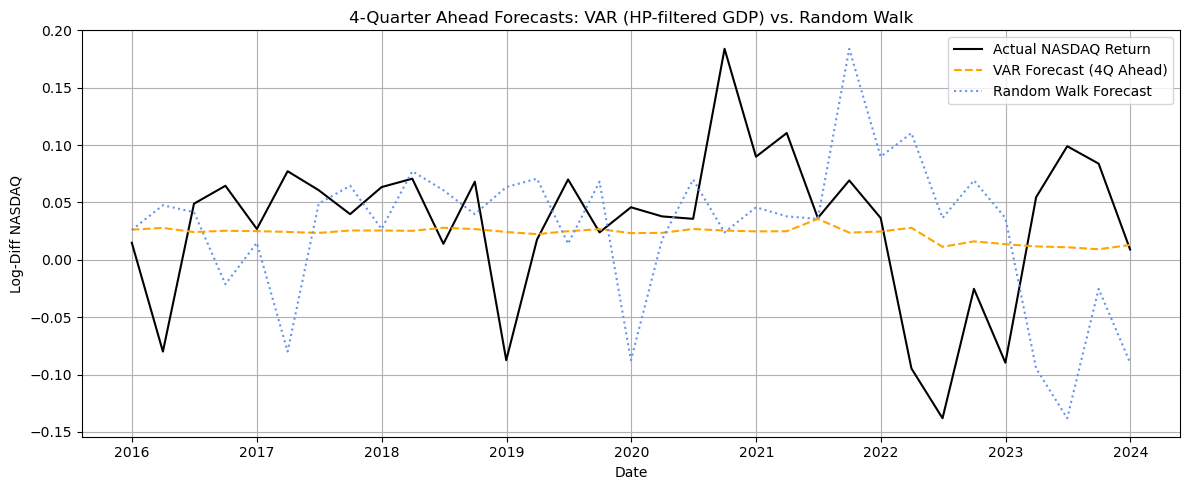

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(result_df.index, result_df['dlog_NASDAQ'], label='Actual NASDAQ Return', color='black')
plt.plot(result_df.index, result_df['Forecasted_dlog_NASDAQ'], '--', label='VAR Forecast (4Q Ahead)', color='orange')
plt.plot(result_df.index, result_df['RW_forecast'], ':', label='Random Walk Forecast', color='cornflowerblue')
plt.title('4-Quarter Ahead Forecasts: VAR (HP-filtered GDP) vs. Random Walk')
plt.xlabel('Date')
plt.ylabel('Log-Diff NASDAQ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Predicted Real Returns for 2022

In [42]:
cpi_preds = []
for i in range(len(df_forecast_all) - forecast_horizon + 1):
    current_index = df_estimation.shape[0] + i
    history = df_cut.iloc[current_index - selected_lag:current_index]
    forecast = var_result.forecast(history.values, steps=forecast_horizon)
    cpi_pred = forecast[-1][df_cut.columns.get_loc('dlog_CPI')]
    cpi_preds.append(cpi_pred)

forecast_df['Forecasted_dlog_CPI'] = cpi_preds

forecast_df['Real_Return'] = forecast_df['Forecasted_dlog_NASDAQ'] - forecast_df['Forecasted_dlog_CPI']
forecast_df['Is_Positive_Real_Return'] = forecast_df['Real_Return'] > 0

real_returns_2022 = forecast_df.loc[forecast_df.index.year == 2022]
print(real_returns_2022[['Forecasted_dlog_NASDAQ', 'Forecasted_dlog_CPI', 'Real_Return', 'Is_Positive_Real_Return']])


            Forecasted_dlog_NASDAQ  Forecasted_dlog_CPI  Real_Return  \
2022-03-31                0.027949             0.005071     0.022877   
2022-06-30                0.011334             0.011649    -0.000315   
2022-09-30                0.016109             0.009681     0.006428   
2022-12-31                0.013647             0.010720     0.002927   

            Is_Positive_Real_Return  
2022-03-31                     True  
2022-06-30                    False  
2022-09-30                     True  
2022-12-31                     True  


Cumulative Return for 2022

In [43]:
nasdaq_2022 = forecast_df['Forecasted_dlog_NASDAQ'].loc[forecast_df.index.year == 2022]
cumulative_log_return = nasdaq_2022.sum()
cumulative_percent_return = (np.exp(cumulative_log_return) - 1) * 100
print(f"\nCumulative predicted log-return (2022): {cumulative_log_return:.4f}")
print(f"Cumulative predicted % return (2022): {cumulative_percent_return:.2f}%")


Cumulative predicted log-return (2022): 0.0690
Cumulative predicted % return (2022): 7.15%


Both filters produce similar predictive performance: Forecast patterns are stable, cumulative returns are comparable, and both outperform the random walk baseline.

HP filter gives slightly better RMSE (0.06578 vs 0.06691), though the difference is marginal.

Forecasted real returns for 2022 are positive in 3 of 4 quarters for both, indicating sensitivity to CPI movements.

Random Walk is clearly worse than either VAR specification, reinforcing the usefulness of multivariate modeling.

k)

In [44]:
df_var = df_transformed[['dlog_GDP', 'dlog_CPI', 'd_int_rate', 'dlog_NASDAQ', 'd_gpr']].dropna()
model = VAR(df_var)
var_result = model.fit(1)

In [45]:
granger_test = var_result.test_causality(causing='d_gpr', caused='dlog_NASDAQ', kind='f')

print(granger_test.summary())

Granger causality F-test. H_0: d_gpr does not Granger-cause dlog_NASDAQ. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
       0.09973          3.854   0.752 (1, 760)
----------------------------------------------


To examine the predictive importance of geopolitical risk (GPR) for stock market performance, I performed a Granger causality test within the VAR(1) framework. Specifically, I tested whether past values of the first difference of the U.S. geopolitical risk index (d_gpr) help predict future values of NASDAQ log-returns (dlog_NASDAQ), after controlling for macroeconomic variables.

The test results show that we fail to reject the null hypothesis that d_gpr does not Granger-cause dlog_NASDAQ (F-statistic = 0.0997, p-value = 0.752). This indicates that, within my model and sample period, the GPR series does not provide statistically significant additional predictive power for stock market returns beyond what is already captured by real GDP growth, inflation, and interest rate changes.

These findings suggest that, while geopolitical risk is important conceptually and may matter during specific crises, its effect on stock market forecasts may not be systematic or strong enough to be detected by a linear VAR model with quarterly data.